### Why getting right DataTypes matter for processing in Spark?

Impact of using bigger data types - for ex: BIGINT or STRING for INT data
- Memory usage BIGINT = 8 bytes per value, INT = 4 bytes 
- for 1 billion rows: INT = 4 GB, BIGINT = 8 GB
- Disk usage - more disk space for larger data type unnecessiarily
- Serialization overhead: As Spark serializes data shuffling and caching. Larger datatypes can incerease serialization overhead.
- Cache performance - Using larger data type than necessary can reduce no. of rows that fit in memory, leading to more frequent disk spills.  

INT Range : -2,147,483,648 to 2,147,483,647  
BIGINT Range : -9,223,372,036,854,775,808 to 9,223,372,036,854,775,807  

For a number like - 123456: As a STRING takes at least 6 bytes - 1 byte per character + metadata overhead - as string requires UTF-8 encoding.

Datasource used: Tpch tables from Databricks community edition 

In [0]:
# Read the orders table into a DataFrame
orders_df = spark.sql("SELECT * FROM samples.tpch.orders")

In [0]:
orders_df.cache()

Out[2]: DataFrame[o_orderkey: bigint, o_custkey: bigint, o_orderstatus: string, o_totalprice: decimal(18,2), o_orderdate: date, o_orderpriority: string, o_clerk: string, o_shippriority: int, o_comment: string]

In [0]:
orders_df.count()

Out[4]: 7500000

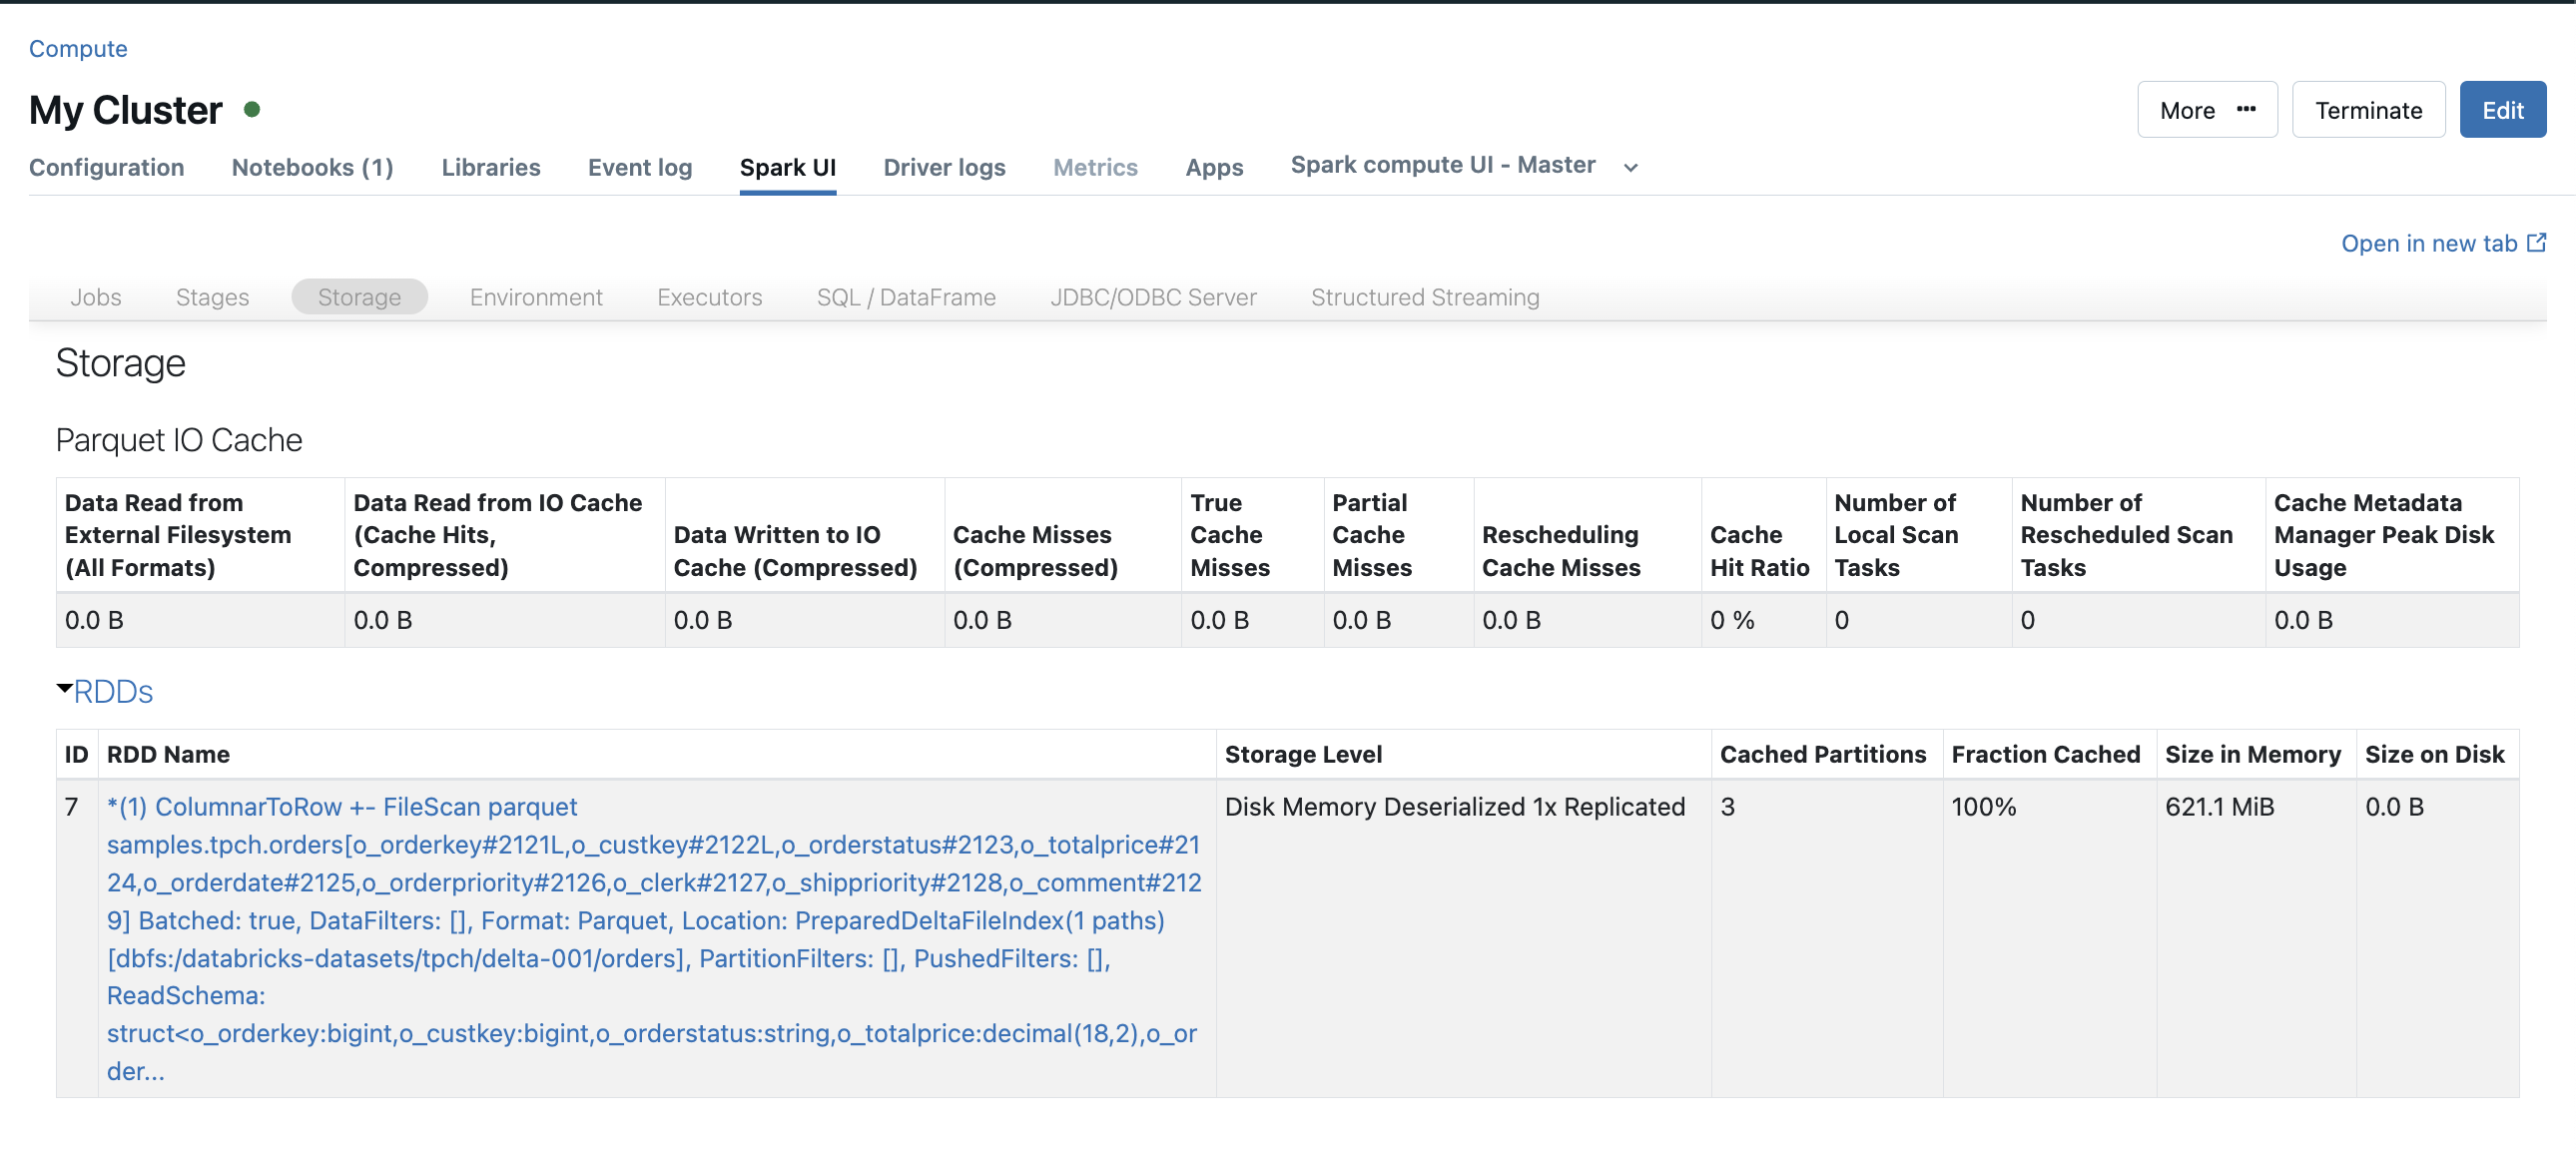

In [1]:
from IPython.display import Image
Image(filename='../UI_screenshots/dtypes/oc-1.png',width=1000,height=5)

In [0]:
orders_df.printSchema()

root
 |-- o_orderkey: long (nullable = true)
 |-- o_custkey: long (nullable = true)
 |-- o_orderstatus: string (nullable = true)
 |-- o_totalprice: decimal(18,2) (nullable = true)
 |-- o_orderdate: date (nullable = true)
 |-- o_orderpriority: string (nullable = true)
 |-- o_clerk: string (nullable = true)
 |-- o_shippriority: integer (nullable = true)
 |-- o_comment: string (nullable = true)



In [0]:
from pyspark.sql.functions import col

# Example: Casting some columns to incorrect data types
orders_incorrect_df = orders_df.withColumn("o_totalprice", col("o_totalprice").cast("string")) \
                        .withColumn("o_shippriority", col("o_shippriority").cast("bigint")) 


In [0]:
orders_incorrect_df.printSchema()

root
 |-- o_orderkey: long (nullable = true)
 |-- o_custkey: long (nullable = true)
 |-- o_orderstatus: string (nullable = true)
 |-- o_totalprice: string (nullable = true)
 |-- o_orderdate: date (nullable = true)
 |-- o_orderpriority: string (nullable = true)
 |-- o_clerk: string (nullable = true)
 |-- o_shippriority: long (nullable = true)
 |-- o_comment: string (nullable = true)



In [0]:
orders_incorrect_df.cache()

Out[8]: DataFrame[o_orderkey: bigint, o_custkey: bigint, o_orderstatus: string, o_totalprice: string, o_orderdate: date, o_orderpriority: string, o_clerk: string, o_shippriority: bigint, o_comment: string]

In [0]:
orders_incorrect_df.count()

Out[9]: 7500000

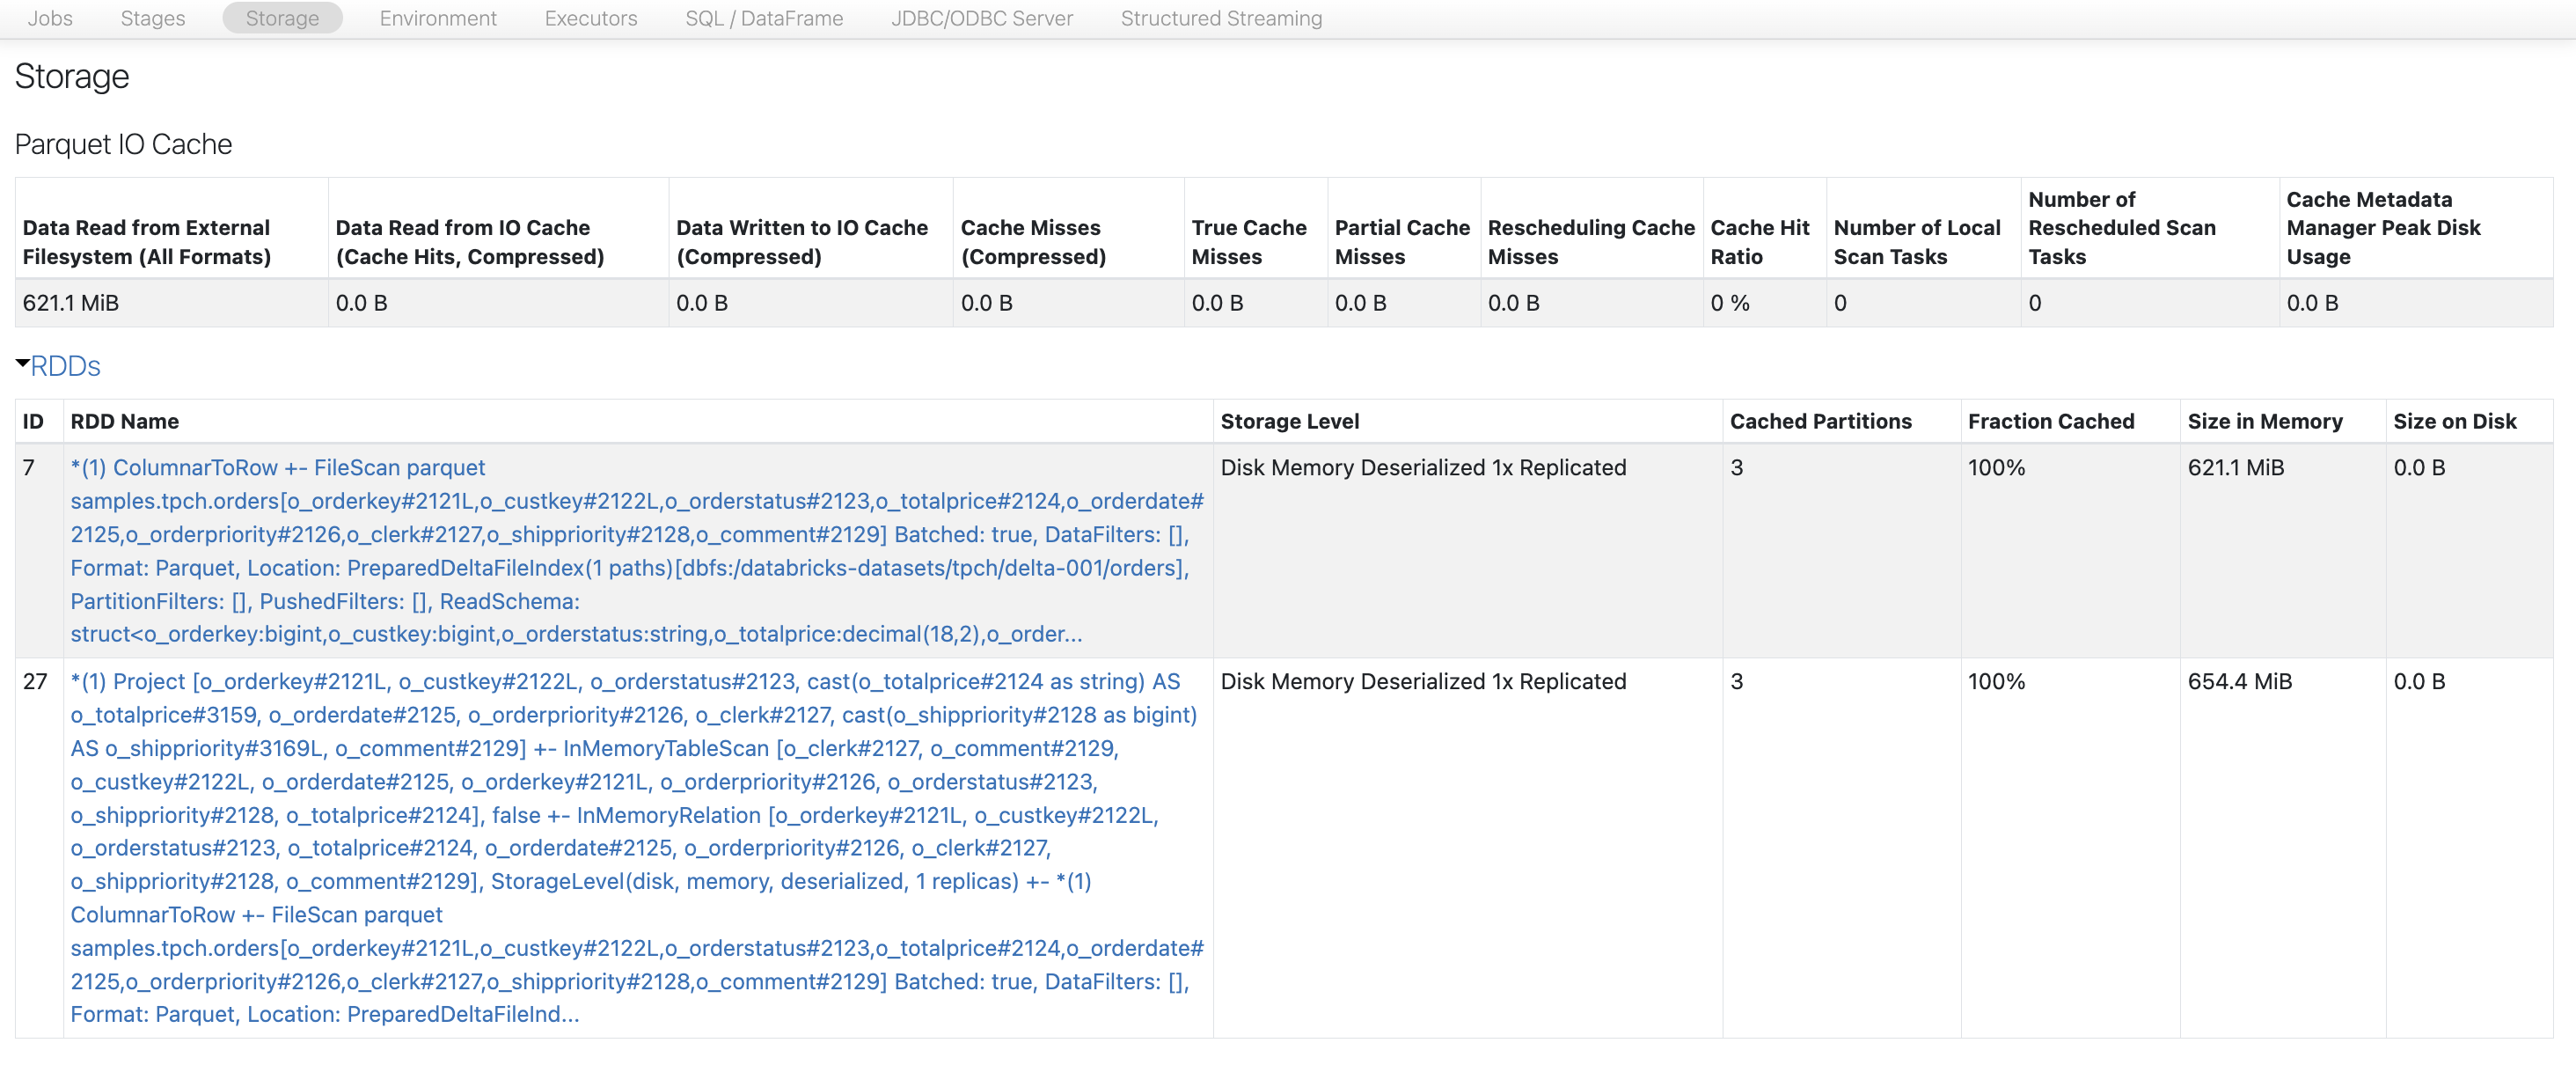

In [2]:
from IPython.display import Image
Image(filename='../UI_screenshots/dtypes/ioc-1.png',width=1000,height=5)

In [0]:
orders_df.unpersist()

Out[10]: DataFrame[o_orderkey: bigint, o_custkey: bigint, o_orderstatus: string, o_totalprice: decimal(18,2), o_orderdate: date, o_orderpriority: string, o_clerk: string, o_shippriority: int, o_comment: string]

In [0]:
orders_incorrect_df.unpersist()

Out[11]: DataFrame[o_orderkey: bigint, o_custkey: bigint, o_orderstatus: string, o_totalprice: string, o_orderdate: date, o_orderpriority: string, o_clerk: string, o_shippriority: bigint, o_comment: string]